In [1]:
# k均值
# 时间复杂度和空间复杂度，时间复杂度指计算用得时间很多，空间复杂度
# 指占用内存很大。
# 其所花的时间比KNN还长
# sklearn.cluster.KMeans()

In [7]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [8]:
# 自己创建数据集
X,y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)

In [3]:
X.shape

(500, 2)

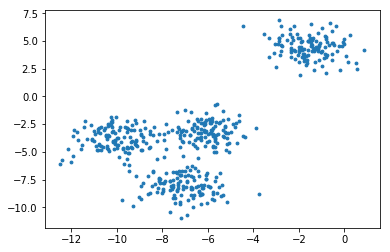

In [4]:
fig,ax1 = plt.subplots(1) # 生成子图几个，并且子图由两部分组成，画布和对象
ax1.scatter(X[:,0],X[:,1]
           ,marker="o" # 点的形状
           ,s=8 # 点的大小
           )
plt.show()

In [5]:
# 如果我们要看点的分布，怎么办？
color = ["red","pink","orange","gray"]
fig,ax1 = plt.subplots(1)
for i in range(4):
    ax1.scatter(X[y==i,0],X[y==i,1]
               ,marker="o"
               ,s=8
               ,color[i]
               )
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-5-9a826079c546>, line 8)

In [6]:
from sklearn.cluster import KMeans

n_clusters = 3

In [7]:
cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(X)  # 聚类不需要调用接口

In [8]:
# 重要属性.labels_,查看聚类好的类别，每个样本所对应的类
y_pred = cluster.labels_
y_pred

array([0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2,
       2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0,
       0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2,

In [9]:
# KMeans 因为并不需要建立模型或者预测结果，因此我们只需要fit就能够得到聚类结果了
# KMeans 也有接口predict和fit_predict,表示学习数据X并对X的类进行预测
# 但所有得到的结果和我们不调用的predict,直接fit之后调用属性labels一模一样
pre = cluster.fit_predict(X)

In [17]:
# pre

In [ ]:
# pre == y_pred

In [19]:
# 我们什么时候需要predict呢？数据量太大的时候。
# 其实我们不必使用所有数据来寻找质心，少量的数据就可以帮助我们确定质心
# 当我们的数据量非常大的时候，我们可以使用部分数据来帮我们确定质心
# 剩下的数据的聚类结果，使用predict 来调用
# 这样大大减少了我们在KMean中要的计算量

In [39]:
cluster_smallsub = KMeans(n_clusters=n_clusters,random_state=0).fit(X[:200])

In [40]:
y_pred_ = cluster_smallsub.predict(X)

In [26]:
# y_pred == y_pred_

In [41]:
# 重要属性cluster_centers_,查看质心
centroid = cluster.cluster_centers_
centroid

array([[-7.09306648, -8.10994454],
       [-1.54234022,  4.43517599],
       [-8.0862351 , -3.5179868 ]])

In [42]:
centroid.shape

(3, 2)

In [43]:
# 重要属性inertia_,查看总距离平方和
inertia = cluster.inertia_
inertia

1903.4503741659223

IndexError: list index out of range

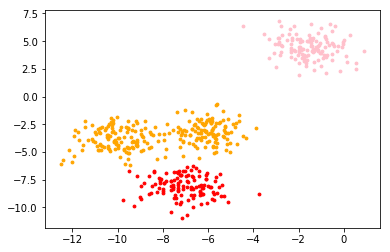

In [48]:
# 对聚类进行可视化
color = ["red","pink","orange","gray"]
fig,ax1 = plt.subplots(1)

for i in range(n_clusters):
    ax1.scatter(X[y_pred==i,0],X[y_pred==i,1]
               ,marker='o'
               ,s=8
               ,c=color[i])
ax1.scatter(centroid[:,0],centroid[:,1]
           ,marker="x"
           ,s=15
           ,c="black")
plt.show()

In [57]:
# 如果我们把猜测的簇数换成4，Inertia会怎样？

n_clusters = 4
cluster_ = KMeans(n_clusters=n_clusters,random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_

908.3855684760613

In [59]:
n_clusters = 5
cluster_ = KMeans(n_clusters=n_clusters,random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_

811.0841324482415

In [47]:
n_clusters = 6
cluster_ = KMeans(n_clusters=n_clusters,random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_

733.153835008308

In [49]:
# 聚类算法的评估指标
#     簇内差异小，簇外差异大

# 真实标签已知
# 1、互信息分（0,1）
# 2、V-measure（0,1）
# 3、调整兰德系数（-1,1）

# 真实标签未知
# 轮廓系数，用来评估簇内稠密和簇间离散程度（-1,1），越接近1越好，负数不好
    # a--样本与其自身所在的簇中的其他样本的相似度
    # b--样本与其他簇中的样本的相似度
#     silhouette_score(返回的是总体均值)    silhoouette_samples（返回的是每个样本自己的轮廓系数）

In [50]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [52]:
X.shape

(500, 2)

In [63]:
# y_pred  # labels_

In [54]:
silhouette_score(X,y_pred)

0.5882004012129721

In [60]:
silhouette_score(X,cluster_.labels_)  # (特征矩阵，聚类预测结果)证明分4簇比分三簇效果更好，但是分5簇就下降了

0.5746932321727457

In [62]:
silhouette_samples(X,y_pred).mean()

0.5882004012129721

In [71]:
# 卡林斯基-哈拉巴斯指数（越高越好）
# 数据之间的离散程度越高，协方差矩阵的迹就会越大，组内离散程度低，协方差的迹就会越小，组间离散程度大，协方差的迹
# 就越大
# 虽然没有界，但是有一个优点是快，运行非常快

In [64]:
from sklearn.metrics import calinski_harabaz_score

In [68]:
# X

In [69]:
y_pred

array([0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2,
       2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0,
       0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2,

In [70]:
calinski_harabaz_score(X,y_pred)

1809.991966958033

In [72]:
from time import time

In [73]:
# time():记下每一次time（）这一行命令时的时间戳
# 时间戳就是一行数字，用来记录此时此刻的时间
t0 = time()
calinski_harabaz_score(X,y_pred)
time() - t0

0.0010018348693847656

In [74]:
t0 = time()
silhouette_score(X,y_pred)
time() - t0

0.01700615882873535

In [75]:
t0

1600078547.1736434

In [76]:
# 时间戳可以通过datetime中的函数fromtimestamp转换成真正的时间格式

import datetime
datetime.datetime.fromtimestamp(t0).strftime("%Y-%m-%d %H:%M:%S")

'2020-09-14 18:15:47'

案例：基于轮廓系数来选择n_clusters

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score # 轮廓系数
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # colormap
import numpy as np
import pandas as pd

In [12]:
# 基于我们的轮廓系数来选择最佳的n_clusters
# 知道每个举出来的类轮廓系数是多少，还想要一个各个类之间的轮廓系数的对比
# 知道聚类完毕之后图像的分布是什么模样
# 只看学习曲线不一定合情理

In [2]:
# 先设定我们要分成的簇数
n_clusters = 4

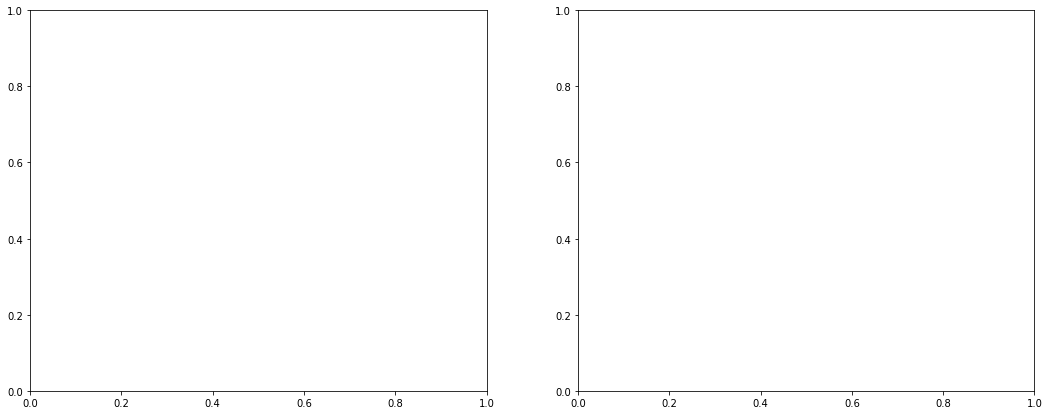

In [3]:
# 创建一个画布，画布上共有一行两列两个图
fig,(ax1,ax2) = plt.subplots(1,2)

# 画布尺寸
fig.set_size_inches(18,7)

In [15]:
# 第一个图是我们的轮廓系数图像，是由各个簇的轮廓系数组成的横向图条形图
# 横向条形图的横坐标是我们的轮廓系数取值，纵坐标是我们的每个样本，因为轮廓系数是对每一个样本进行计算的

In [4]:
# 首先我们设定横坐标
# 轮廓系数的取值范围是【-1,1】之间，但我们至少是希望轮廓系数要大于0的
# 太长的横坐标不利于我们的可视化，所以只设定X轴的取值子【-0.1,1】之间
ax1.set_xlim([-0.1,1])

(-0.1, 1)

In [9]:
# 接下来设定纵坐标，通常来说，纵坐标是从0开始的，最大取值到X.shape[0]的取值
# 但我们希望，每个簇能够排在一起，不同的簇之间能够有一定的空隙
# 以便我们看到不同的条形图聚合成的块，理解它是对应了哪一个簇
# 因此我们在设定纵坐标的取值范围的时候，在X.shape[0]上，加上一个距离（n_cluster + 1）* 10 ，留作间隔用
ax1.set_ylim([0,X.shape[0] +(n_clusters + 1)*10])

(0, 550)

In [10]:
# 开始建模，调用聚类好的标签
clusterer = KMeans(n_clusters=n_clusters,random_state=10).fit(X)
cluster_labels = clusterer.labels_

In [11]:
# 调用轮廓系数分数，注意，silhouette_score生成的是所有样本点的轮廓系数的均值
# 两个需要输入的参数是，特征矩阵X和聚类完毕后的标签
silhouette_avg = silhouette_score(X,cluster_labels)

# 用print来报一下结果，现在的簇数量下，整体的轮廓系数究竟有多少？
print("For n_clusters =",n_clusters,
     "The average silhouette_score is :",silhouette_avg)

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


In [12]:
# 调用silhouette_samples,返回每个样本点的轮廓系数，这就是我们的横坐标
sample_silhouette_values = silhouette_samples(X,cluster_labels)

In [13]:
# 设定y轴上的初始值
y_lower = 10

# 接下来，对每一个簇进行循环
for i in range(n_clusters):
    # 从每个样本的轮廓系数结果中抽取出第i个簇的轮廓系数，并对他进行排序
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    
    # 注意，.sort()这个命令会直接改掉原来数据的顺序
    ith_cluster_silhouette_values.sort()
    
    # 查看这一个簇中有多少个样本
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    
    # 这一个簇在y轴上的取值，应该是由初始值（y_lower)开始，到初始值+加上这个簇中的样本数量结束（y_upper）
    y_upper = y_lower + size_cluster_i
    
    # colormap库中的，使用小数来调用颜色的函数
    # 在nipy_spectral([输入任意小数来代表一个颜色])
    # 这里我们希望每一个簇的颜色是不同的，我们需要的颜色种类刚好是循环的个数的种类
    # 在这里，只要能够确保，每次循环生成的小数是不同的，可以使用任意方式来获取小数
    # 在这里，我是用i的浮点数除以n_clusters,在不同的i下，自然生成不同的小数
    # 以确保所有的簇会有不同的颜色
    color = cm.nipy_spectral(float(i)/n_clusters)
    
    # 开始填充子图1中的内容
    # fill_between是让一个范围中的柱状图都统一颜色的函数
    # fill_betweenx的范围是在纵坐标上
    # fill_betweeny的范围是在横坐标上
    # fill_betweenx的参数应该输入（纵坐标的下限，纵坐标的上限，x轴上的取值，柱状图的颜色）
    ax1.fill_betweenx(np.arange(y_lower,y_upper)
                      ,ith_cluster_silhouette_values# 这些柱子所对应的横坐标的取值是每个样本所对应的轮廓系数
                      ,facecolor=color
                      ,alpha=0.7
                     )
    
    # 为每个轮廓系数写上簇的编号，并且让簇的编号显示坐标轴上每个条形图的中间位置
    # text的参数为（要显示编号的位置的横坐标，要显示编号的位置的纵坐标，要显示的编号的内容）
    ax1.text(-0.5
             ,y_lower + 0.5 * size_cluster_i
             ,str(i)
            )
    # 为下一个簇计算新的y轴上的初始值，是每一次迭代之后，y的上限再加上10
    # 以此来保证，不同的簇的图像之间显示有空隙
    y_lower = y_upper + 10

In [14]:
# 给图1加上标题，横坐标轴，纵坐标轴的标签
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# 把整个数据集上轮廓系数的均值以虚线的形式放入我们的图中
ax1.axvline(x=silhouette_avg,color="red",linestyle="--")

# 让y轴上不显示刻度
ax1.set_yticks([])

# 让x轴上的刻度显示为我们规定的列表
ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

In [16]:
# 开始对第二个图进行处理
colors = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
ax2.scatter(X[:,0],X[:,1]
           ,marker="o"
           ,s=8
           ,c=colors)
# 把生成的质心放到图像中去
centers = clusterer.cluster_centers_

ax2.scatter(centers[:,0],centers[:,1],marker="x",
           c="red",alpha=1,s=200)

# 标题
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the lst feature")
ax2.set_ylabel("Feature space for the 2nd feature")

# 为整个图设置标题
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data"
           "with n_clusters = %d"%n_clusters),
            fontsize=14,fontweight='bold')
plt.show()

<Figure size 432x288 with 0 Axes>

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


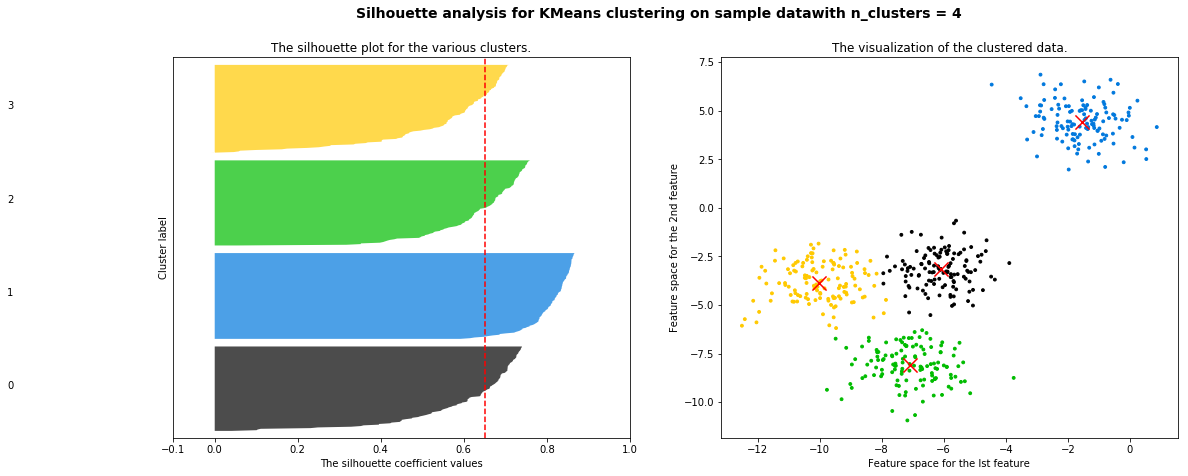

In [17]:
# 完整的

n_clusters = 4

# 创建一个画布，画布上共有一行两列两个图
fig,(ax1,ax2) = plt.subplots(1,2)

# 画布尺寸
fig.set_size_inches(18,7)
# 首先我们设定横坐标
# 轮廓系数的取值范围是【-1,1】之间，但我们至少是希望轮廓系数要大于0的
# 太长的横坐标不利于我们的可视化，所以只设定X轴的取值子【-0.1,1】之间
ax1.set_xlim([-0.1,1])

# 接下来设定纵坐标，通常来说，纵坐标是从0开始的，最大取值到X.shape[0]的取值
# 但我们希望，每个簇能够排在一起，不同的簇之间能够有一定的空隙
# 以便我们看到不同的条形图聚合成的块，理解它是对应了哪一个簇
# 因此我们在设定纵坐标的取值范围的时候，在X.shape[0]上，加上一个距离（n_cluster + 1）* 10 ，留作间隔用
ax1.set_ylim([0,X.shape[0] +(n_clusters + 1)*10])

# 开始建模，调用聚类好的标签
clusterer = KMeans(n_clusters=n_clusters,random_state=10).fit(X)
cluster_labels = clusterer.labels_

# 调用轮廓系数分数，注意，silhouette_score生成的是所有样本点的轮廓系数的均值
# 两个需要输入的参数是，特征矩阵X和聚类完毕后的标签
silhouette_avg = silhouette_score(X,cluster_labels)

# 用print来报一下结果，现在的簇数量下，整体的轮廓系数究竟有多少？
print("For n_clusters =",n_clusters,
     "The average silhouette_score is :",silhouette_avg)

# 调用silhouette_samples,返回每个样本点的轮廓系数，这就是我们的横坐标
sample_silhouette_values = silhouette_samples(X,cluster_labels)

# 设定y轴上的初始值
y_lower = 10

# 接下来，对每一个簇进行循环
for i in range(n_clusters):
    # 从每个样本的轮廓系数结果中抽取出第i个簇的轮廓系数，并对他进行排序
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    
    # 注意，.sort()这个命令会直接改掉原来数据的顺序
    ith_cluster_silhouette_values.sort()
    
    # 查看这一个簇中有多少个样本
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    
    # 这一个簇在y轴上的取值，应该是由初始值（y_lower)开始，到初始值+加上这个簇中的样本数量结束（y_upper）
    y_upper = y_lower + size_cluster_i
    
    # colormap库中的，使用小数来调用颜色的函数
    # 在nipy_spectral([输入任意小数来代表一个颜色])
    # 这里我们希望每一个簇的颜色是不同的，我们需要的颜色种类刚好是循环的个数的种类
    # 在这里，只要能够确保，每次循环生成的小数是不同的，可以使用任意方式来获取小数
    # 在这里，我是用i的浮点数除以n_clusters,在不同的i下，自然生成不同的小数
    # 以确保所有的簇会有不同的颜色
    color = cm.nipy_spectral(float(i)/n_clusters)
    
    # 开始填充子图1中的内容
    # fill_between是让一个范围中的柱状图都统一颜色的函数
    # fill_betweenx的范围是在纵坐标上
    # fill_betweeny的范围是在横坐标上
    # fill_betweenx的参数应该输入（纵坐标的下限，纵坐标的上限，x轴上的取值，柱状图的颜色）
    ax1.fill_betweenx(np.arange(y_lower,y_upper)
                      ,ith_cluster_silhouette_values# 这些柱子所对应的横坐标的取值是每个样本所对应的轮廓系数
                      ,facecolor=color
                      ,alpha=0.7
                     )
    
    # 为每个轮廓系数写上簇的编号，并且让簇的编号显示坐标轴上每个条形图的中间位置
    # text的参数为（要显示编号的位置的横坐标，要显示编号的位置的纵坐标，要显示的编号的内容）
    ax1.text(-0.5
             ,y_lower + 0.5 * size_cluster_i
             ,str(i)
            )
    # 为下一个簇计算新的y轴上的初始值，是每一次迭代之后，y的上限再加上10
    # 以此来保证，不同的簇的图像之间显示有空隙
    y_lower = y_upper + 10
    
    # 给图1加上标题，横坐标轴，纵坐标轴的标签
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# 把整个数据集上轮廓系数的均值以虚线的形式放入我们的图中
ax1.axvline(x=silhouette_avg,color="red",linestyle="--")

# 让y轴上不显示刻度
ax1.set_yticks([])

# 让x轴上的刻度显示为我们规定的列表
ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

# 开始对第二个图进行处理
colors = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
ax2.scatter(X[:,0],X[:,1]
           ,marker="o"
           ,s=8
           ,c=colors)
# 把生成的质心放到图像中去
centers = clusterer.cluster_centers_

ax2.scatter(centers[:,0],centers[:,1],marker="x",
           c="red",alpha=1,s=200)

# 标题
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the lst feature")
ax2.set_ylabel("Feature space for the 2nd feature")

# 为整个图设置标题
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data"
           "with n_clusters = %d"%n_clusters),
            fontsize=14,fontweight='bold')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


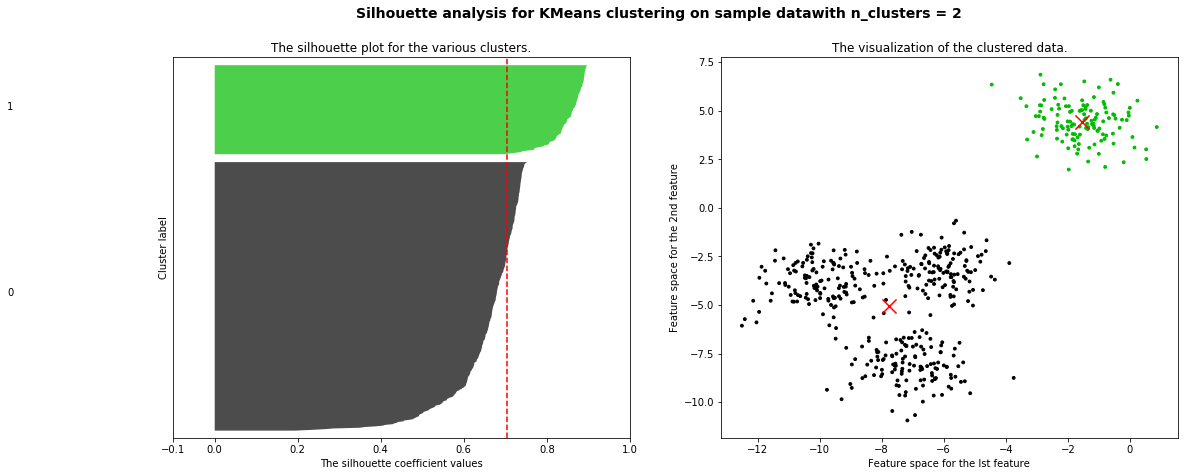

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


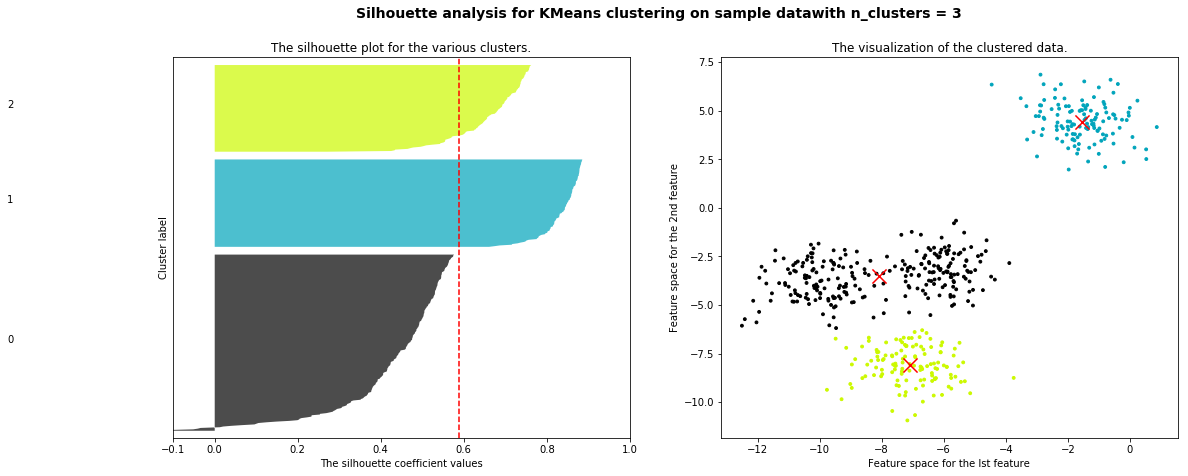

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


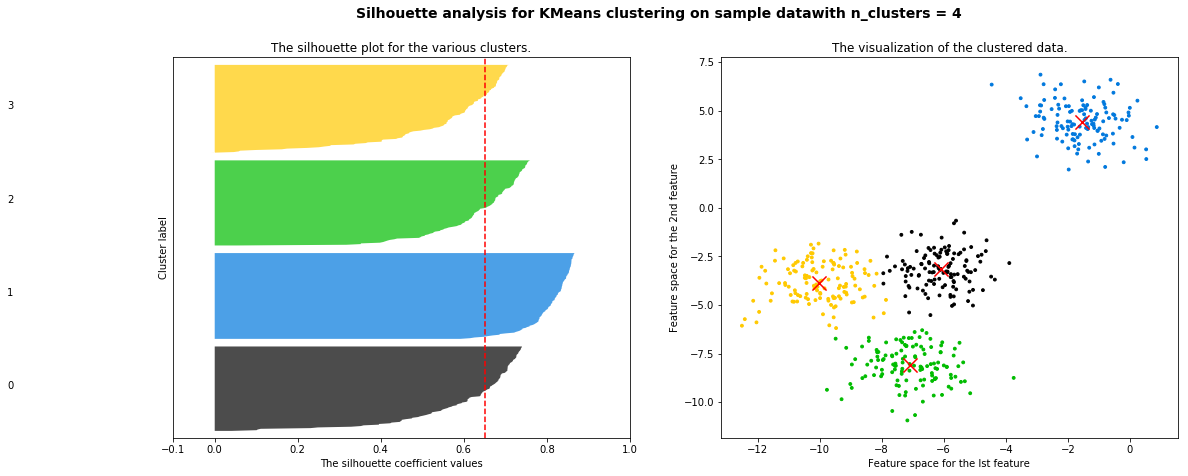

For n_clusters = 5 The average silhouette_score is : 0.56376469026194


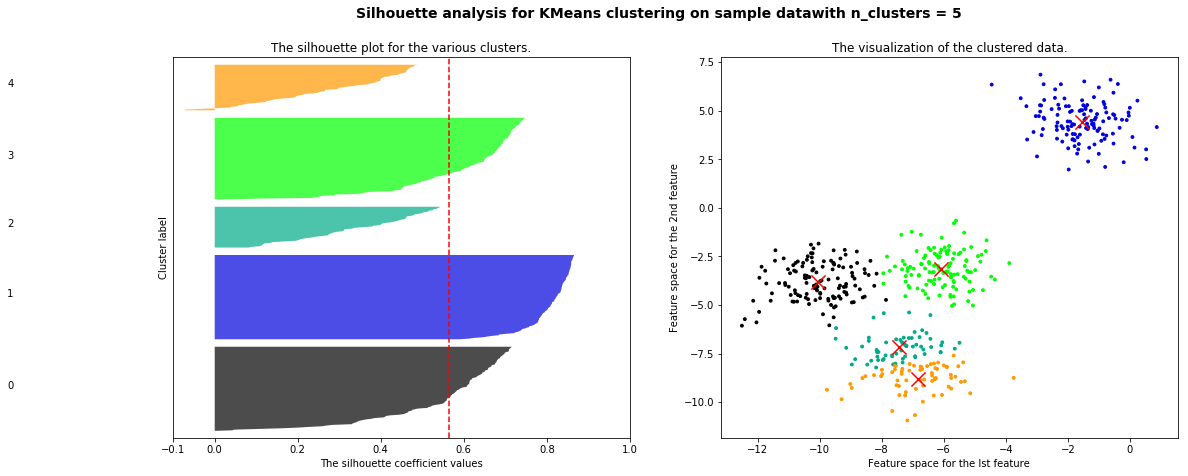

For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


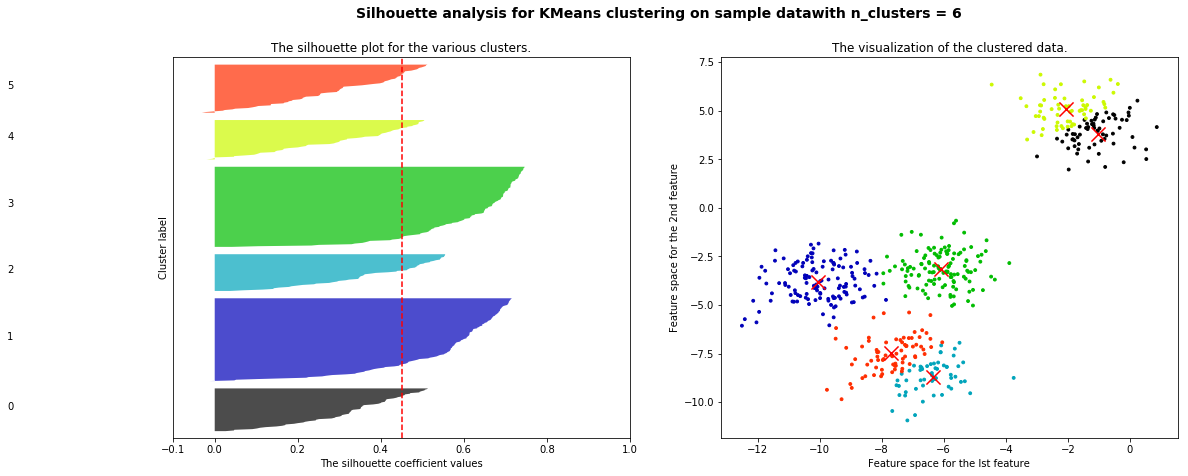

For n_clusters = 7 The average silhouette_score is : 0.39092211029930857


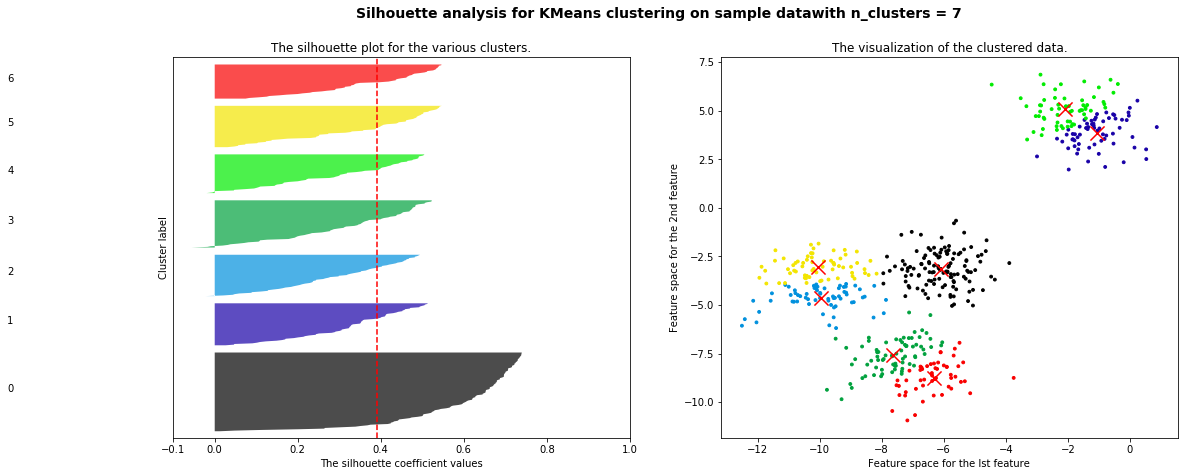

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

for n_clusters in [2,3,4,5,6,7]:
    n_clusters = n_clusters
    fig,(ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,X.shape[0] +(n_clusters + 1)*10])
    
    clusterer = KMeans(n_clusters=n_clusters,random_state=10).fit(X)
    
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X,cluster_labels)
    print("For n_clusters =",n_clusters,
     "The average silhouette_score is :",silhouette_avg)
    sample_silhouette_values = silhouette_samples(X,cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper)
                      ,ith_cluster_silhouette_values# 这些柱子所对应的横坐标的取值是每个样本所对应的轮廓系数
                      ,facecolor=color
                      ,alpha=0.7
                     )
        ax1.text(-0.5
             ,y_lower + 0.5 * size_cluster_i
             ,str(i)
            )
        y_lower = y_upper + 10
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")  
    
    ax1.axvline(x=silhouette_avg,color="red",linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    colors = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(X[:,0],X[:,1]
           ,marker="o"
           ,s=8
           ,c=colors)
    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:,0],centers[:,1],marker="x",
           c="red",alpha=1,s=200)
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the lst feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data"
               "with n_clusters = %d"%n_clusters),
                fontsize=14,fontweight='bold')
    plt.show()

In [20]:
# 在这里，分两簇和分四簇都可以，看业务，看成本。很多公司开始都是分两类。

初始化随机点

In [21]:
X.shape

(500, 2)

In [22]:
y.shape

(500,)

In [29]:
from time import time
t0 = time()
plus = KMeans(n_clusters = 10).fit(X)
plus.n_iter_
time() - t0

# KMeans++ 时间会更长，迭代次数更加少。

0.10507321357727051

In [30]:
t0 = time()
random = KMeans(n_clusters = 10,init='random',random_state=420).fit(X)
random.n_iter_
time() - t0

# random  时间会更短，因为不需要在初始化的时候进行计算，但是迭代步数更多

0.08907079696655273

max_iter:最大迭代次数，默认300,
tol：默认1e-4,两次迭代期间inertia下降的量，如果两次迭代期间inertia下降的值小于tol所设定的值，迭代就会停止。
当数据量很大的时候，可以使用这两个参数。

In [32]:
random = KMeans(n_clusters = 10,init="random",max_iter=10,random_state=420).fit(X)
y_pred_max10 = random.labels_
silhouette_score(X,y_pred_max10)

0.3952586444034157

In [33]:
random = KMeans(n_clusters = 10,init="random",max_iter=10,random_state=420).fit(X)
y_pred_max20 = random.labels_
silhouette_score(X,y_pred_max20)

0.3952586444034157

属性：
    cluster_centers_：收敛到质心，如果提前停下，则与labels反应出来的聚类不一致。
    labels_： 每个样本点对应的标签
    inertia_： 每个样本点到距离他们最近的簇心得均方距离，“簇内平方和”
    n_iter_： 实际的迭代次数
    
接口：
    fit
    fit_predict
    predict
    score
    transform

函数cluster.k_means
    直接一次性返回 质心-每个样本对应的簇的标签-inertia-最佳迭代次数

In [34]:
from sklearn.cluster import k_means

k_means(X,4,return_n_iter=True)
# 参数return_n_iter默认为False，调整为True后就可以看到返回的最佳迭代次数了

(array([[ -1.54234022,   4.43517599],
        [ -7.09306648,  -8.10994454],
        [ -6.08459039,  -3.17305983],
        [-10.00969056,  -3.84944007]]),
 array([1, 1, 3, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 3, 3,
        2, 0, 2, 2, 0, 0, 3, 2, 1, 0, 2, 1, 2, 1, 3, 3, 1, 3, 2, 3, 0, 2,
        2, 1, 3, 2, 0, 0, 0, 3, 3, 2, 1, 3, 3, 3, 3, 2, 0, 0, 3, 2, 0, 2,
        1, 2, 3, 3, 1, 3, 2, 1, 2, 2, 1, 2, 2, 3, 0, 0, 3, 0, 0, 3, 3, 0,
        3, 3, 0, 1, 3, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0, 3, 0, 2, 2, 0, 0, 3,
        2, 1, 0, 3, 0, 3, 0, 2, 0, 2, 3, 1, 1, 3, 2, 3, 0, 1, 1, 2, 0, 3,
        3, 3, 3, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 3, 3, 0, 1,
        0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 2, 0, 1, 3, 2, 1, 0, 3,
        3, 3, 3, 1, 2, 3, 0, 1, 1, 3, 2, 1, 1, 2, 0, 0, 1, 1, 2, 0, 2, 1,
        1, 0, 1, 3, 0, 2, 2, 1, 2, 3, 1, 2, 3, 2, 3, 1, 2, 2, 2, 0, 3, 0,
        2, 1, 3, 2, 3, 3, 3, 0, 3, 0, 1, 3, 1, 3, 0, 0, 3, 1, 0, 1, 2, 3,
        1, 1, 1, 1, 2, 3, 1, 3, 

案例：聚类算法用于降维

KMeans的矢量量化应用（K-Means聚类的一个应用是非结构数据-“图像、声音”-的适量量化VQ）

-----矢量量化：压缩数据的大小。保证质量的前提下，减小内存占用，本质是降维。但不同于之前的降维思维。特征选择是
选择对模型贡献大的特征，PCA是聚合信息。而矢量量化是在同等样本量上压缩信息的大小。其实也是聚合那些最重要的信息
但不改变数据的维度，不改变特征的数目，也不改变样本的数目。只改变这些特征下样本的信息量。

用质心代表所在簇所有样本的X，y

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin # 对两个序列中的点进行匹配的函数
from sklearn.datasets import load_sample_image  # 导入图片数据所用的库
from sklearn.utils import shuffle  # 打乱一个有序的序列的函数-----洗牌

In [2]:
china = load_sample_image("china.jpg")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


In [3]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [4]:
china.dtype

dtype('uint8')

In [5]:
china.shape
# 长度*宽度*像素》三个数决定的颜色

(427, 640, 3)

In [6]:
china[0][0] 

array([174, 201, 231], dtype=uint8)

In [7]:
# 包含了多少种不同的颜色
newimage = china.reshape((427 * 640,3))

In [8]:
newimage.shape

(273280, 3)

In [9]:
import pandas as pd
pd.DataFrame(newimage).drop_duplicates().shape

(96615, 3)

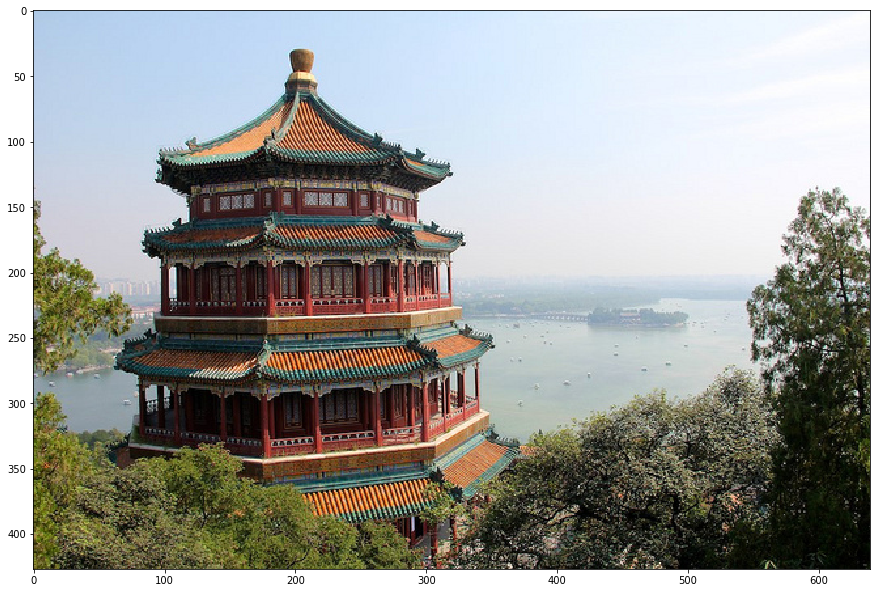

In [10]:
plt.figure(figsize=(15,15))
plt.imshow(china) # 导入三维数组形成的图片

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


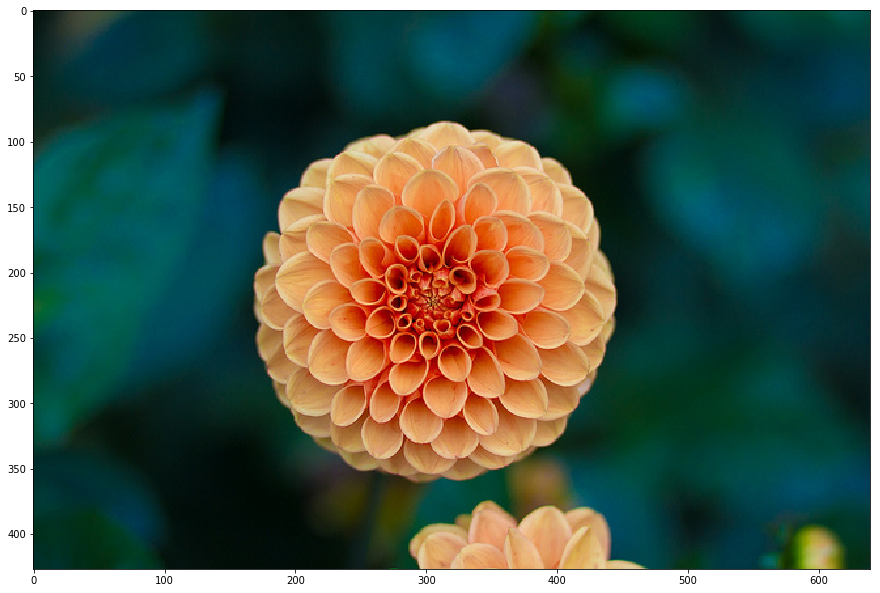

In [11]:
# 查看另一张照片
flower = load_sample_image("flower.jpg")
plt.figure(figsize=(15,15))
plt.imshow(flower)

In [47]:
# 使用K-Means来将9W种颜色聚类成64类，然后使用64个簇的质心来替代全部的9W种颜色
# K-Means不接受三维数组，只接受二维的。

In [32]:
n_clusters = 64
china = np.array(china, dtype=np.float64) / china.max()
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

In [13]:
# plt.imshow在浮点数上表现的更加优秀，在这里我们把china中的数据转换为浮点数，压缩到[0,1]之间。
china = np.array(china, dtype=np.float64) / china.max()

In [16]:
(china <0).sum()

0

In [17]:
# 把china图像的格式转换为矩阵的格式
w, h, d = original_shape = tuple(china.shape) 

In [18]:
w

427

In [19]:
h

640

In [20]:
d

3

In [ ]:
assert d == 3  # assert 后面如果返回的是False 就会报错，是True 则不会报错。

In [21]:
d_ = 3
assert d_ == 3, "一个格子中的特征数目不等于3"

In [29]:
image_array = np.reshape(china, (w * h, d))
# np.reshape(a,newshape,order="C") 第一个参数是要改变的结构的对象，第二个参数是要改变的新的结构。

In [30]:
image_array

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [31]:
image_array.shape

(273280, 3)

In [22]:
a = np.random.random((2,4))

In [23]:
a

array([[0.31005151, 0.94018172, 0.84739723, 0.7648736 ],
       [0.78567555, 0.49495035, 0.11200563, 0.41171468]])

In [24]:
a.reshape((4,2))

array([[0.31005151, 0.94018172],
       [0.84739723, 0.7648736 ],
       [0.78567555, 0.49495035],
       [0.11200563, 0.41171468]])

In [25]:
np.reshape(a,(4,2))

array([[0.31005151, 0.94018172],
       [0.84739723, 0.7648736 ],
       [0.78567555, 0.49495035],
       [0.11200563, 0.41171468]])

In [27]:
np.reshape(a,(2,2,2)).shape

(2, 2, 2)

In [28]:
# 无论几维，只要维度之间相乘后的总数据量不变，维度可以随便变换。

对数据进行矢量量化

In [33]:
# 首先先使用1000个数据来找出质心
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_array_sample)
kmeans.cluster_centers_

array([[0.62570806, 0.60261438, 0.53028322],
       [0.15546218, 0.1557423 , 0.12829132],
       [0.82063983, 0.89896801, 0.98462332],
       [0.42039216, 0.43843137, 0.2227451 ],
       [0.69527105, 0.74994233, 0.76516724],
       [0.92174422, 0.9556336 , 0.99514194],
       [0.07058824, 0.0754637 , 0.0508744 ],
       [0.28205128, 0.26395173, 0.19638009],
       [0.46509804, 0.43372549, 0.36901961],
       [0.71328976, 0.41960784, 0.31851852],
       [0.83529412, 0.86349206, 0.89505135],
       [0.76068627, 0.85617647, 0.9604902 ],
       [0.36372549, 0.36830065, 0.31405229],
       [0.34509804, 0.1654902 , 0.12901961],
       [0.53448674, 0.53264129, 0.50657439],
       [0.15098039, 0.24444444, 0.25228758],
       [0.56764706, 0.61993464, 0.6369281 ],
       [0.89411765, 0.63764706, 0.43529412],
       [0.58823529, 0.5630719 , 0.40588235],
       [0.60392157, 0.30326797, 0.25882353],
       [0.50784314, 0.31568627, 0.17908497],
       [0.0310856 , 0.0288857 , 0.01759923],
       [0.

In [34]:
kmeans.cluster_centers_.shape

(64, 3)

In [35]:
# 找出质心后，按照已存在的质心对所有数据进行聚类
labels = kmeans.predict(image_array)
labels.shape

(273280,)

In [36]:
# 使用质心来替换所有样本
image_kmeans = image_array.copy()

In [37]:
image_kmeans # 27w个样本点，9w多种不同的颜色（像素点）

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [40]:
labels # 这27w个样本点所对应的簇的质心的索引

array([62, 62, 62, ...,  1,  6,  6])

In [41]:
kmeans.cluster_centers_[labels[0]]

array([0.73524384, 0.82021116, 0.91925591])

In [47]:
for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]

In [48]:
# 查看生成的新图片信息
image_kmeans

array([[0.73524384, 0.82021116, 0.91925591],
       [0.73524384, 0.82021116, 0.91925591],
       [0.73524384, 0.82021116, 0.91925591],
       ...,
       [0.15546218, 0.1557423 , 0.12829132],
       [0.07058824, 0.0754637 , 0.0508744 ],
       [0.07058824, 0.0754637 , 0.0508744 ]])

In [49]:
image_kmeans.shape

(273280, 3)

In [50]:
pd.DataFrame(image_kmeans).drop_duplicates().shape

(64, 3)

In [51]:
# 恢复图片的结构
image_kmeans = image_kmeans.reshape(w,h,d)
image_kmeans.shape

(427, 640, 3)

In [53]:
centroid_random = shuffle(image_array, random_state=0)[:n_clusters]  # 随机抽取64个点作为我们的质心。

In [55]:
centroid_random.shape

(64, 3)

In [56]:
labels_random = pairwise_distances_argmin(centroid_random,image_array,axis=0)

# 函数pairwise_distances_argmin(x1,x2,axis)   x1和x2分别是两个序列
# 用来计算x2中的每个样本到x1中的每个样本点的距离，并返回和x2相同形状的，x1中对应的最近的样本点的索引

In [57]:
labels_random.shape

(273280,)

In [60]:
set(labels_random)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63}

In [61]:
len(set(labels_random))

64

In [62]:
# 使用随机质心来替换所有的样本
image_random = image_array.copy()

In [64]:
for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]

In [65]:
# 恢复图片的结构
image_random = image_random.reshape(w,h,d)
image_random.shape

(427, 640, 3)

 将原图，按KMeans矢量量化和随机矢量量化的图像绘制出来

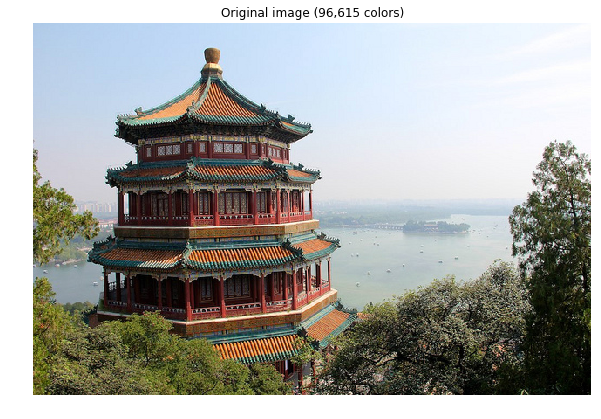

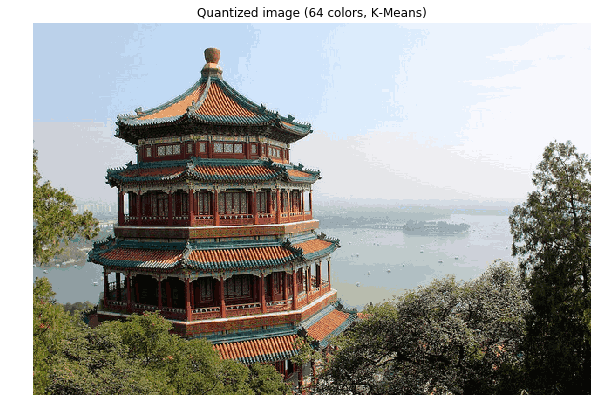

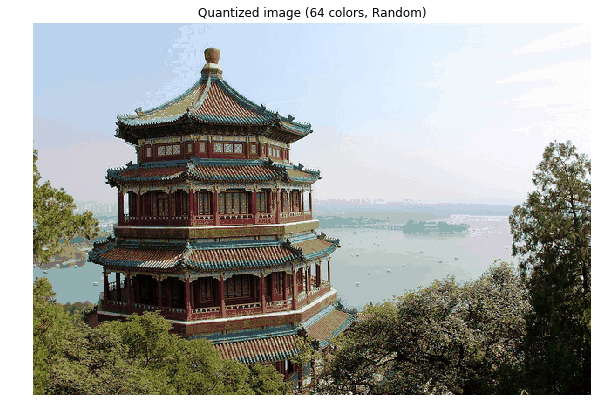

In [66]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(image_kmeans)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(image_random)

plt.show()